In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/finland-news/news_headlines_en_2022.csv
/kaggle/input/finland-news/news_headlines_en_2021.csv


In [2]:
# Load data

df = pd.read_csv('../input/finland-news/news_headlines_en_2022.csv', sep='\t')
df.sample(10)

,date,headline,link
2333,2022-07-08 18:53:35,Official: Trial of updated eastern border fenc...,https://yle.fi/news/3-12529920
455,2022-02-08 06:01:23,Prime Minister Marin responds to criticism ove...,https://www.helsinkitimes.fi/finland/finland-n...
601,2022-02-18 11:12:26,Finland expecting sharp upswing in number of U...,https://yle.fi/news/3-12323799
2998,2022-10-10 13:46:17,Finland 'strongly condemns' Russia's missile a...,https://yle.fi/news/3-12654718
2127,2022-06-16 11:35:38,Full electricity generation at Olkiluoto 3 del...,https://yle.fi/news/3-12496304
2029,2022-06-08 17:02:29,Convicted Turku terror attacker faces charges ...,https://yle.fi/news/3-12482571
1138,2022-03-31 12:40:50,Centre appoints Kurvinen as agriculture minist...,https://yle.fi/news/3-12384403
3371,2022-11-28 10:11:39,Environmental specialists: Proposed border fen...,https://yle.fi/a/3-12682034
3237,2022-11-10 06:01:08,"Finnish educators expand reach, geographically...",https://www.goodnewsfinland.com/news-spotlight...
947,2022-03-16 09:37:29,"Wednesday's papers: NCP gains support, Europe ...",https://yle.fi/news/3-12360749


In [3]:
# Check for missing values

mis_val = df.isnull().sum()
mis_val

date        0
headline    0
link        1
dtype: int64

In [4]:
# Import necessary library for text analysis

import nltk 

# Drop column link and date (unnecessary in my analysis)

df.drop(['link', 'date'], axis = 1, inplace = True)
df.head(10)

,headline
0,Omicron now dominant Covid strain in Helsinki.
1,Marin on NATO: Finland should keep options open.
2,"Russia-US tensions also impact Finland, presid..."
3,Finland sees leap in births.
4,Finland pays €14 million in compensation to ev...
5,Planning on staying active in 2022? Here's how...
6,Tax authority increases credits for household ...
7,Greens leader Ohisalo welcomes baby.
8,Finland's Foreign Minister: Important that US ...
9,Helsinki exempt from historic 'sote' reform of...


WordCloud takes  36.105912923812866 second


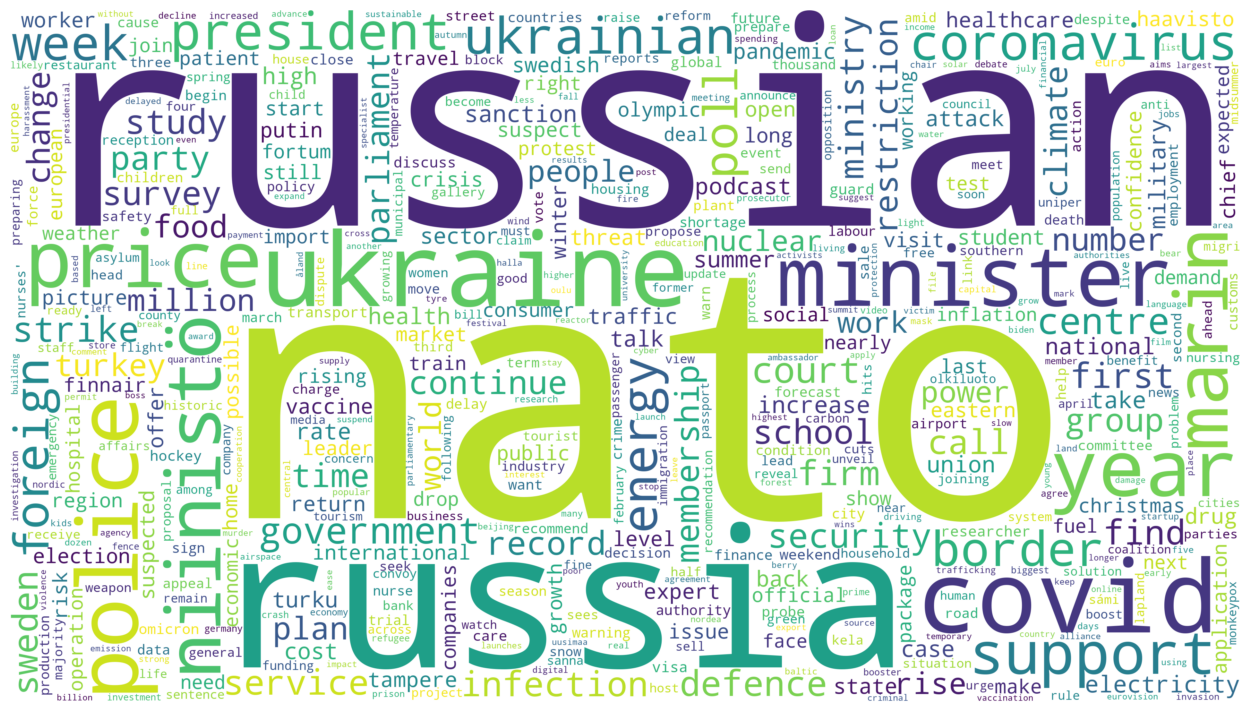

In [5]:
"""
Create word cloud using the wordcloud package
""" 

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create stopwords set which is a combination of wordcloud and nltk packages
stopwords = set(STOPWORDS)
stopwords.update(set(nltk.corpus.stopwords.words('english')))
typical_words = {'finland', 'finnish', 'finns', 'helsinki', 'paper', 'new', 'yle', 
                 'report', 'papers', 'says',
                 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'}
stopwords.update(typical_words)
text = df['headline'].apply(lambda x: x.lower()).sum()

start = time.time()
plt.figure(figsize = (16, 9))
wordcloud = WordCloud(width = 3840, 
                      height = 2160, 
                      max_words = 500, 
                      stopwords = stopwords, 
                      collocations = False, 
                      min_word_length = 4,
                      background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
end = time.time()
print("WordCloud takes ", end - start, "second")

In [6]:
"""
  Now we manually tokenize and lemmatize the headlines to find out the most common words
using the nltk package
""" 

'\n  Now we manually tokenize and lemmatize the headlines to find out the most common words\nusing the nltk package\n'

In [7]:
# Remove all noun possessive
start1 = time.time()
df['headline_without_possessive'] = df['headline'].apply(lambda x: x.replace("'s", "")
                                                                 .replace("’s", "")) 
df.sample(10)

,headline,headline_without_possessive
1189,Amnesty Finland chief: Horrific civilian killi...,Amnesty Finland chief: Horrific civilian killi...
3130,Survey: 40% of foreign specialists face discri...,Survey: 40% of foreign specialists face discri...
890,HVK: Finland should re-examine security of sup...,HVK: Finland should re-examine security of sup...
2422,"THL expert: Flu season may be more intense, ar...","THL expert: Flu season may be more intense, ar..."
736,NCP demands Finland send arms to Ukraine.,NCP demands Finland send arms to Ukraine.
813,Finland buying Israeli air defence weapons.,Finland buying Israeli air defence weapons.
3326,Finnish scientists break down problematic plas...,Finnish scientists break down problematic plas...
2405,Party lines divide support for drug consumptio...,Party lines divide support for drug consumptio...
1852,Artist Pearla Pigao’s interactive work complet...,Artist Pearla Pigao interactive work completed...
3463,Ukrainian refugees soon eligible for resident ...,Ukrainian refugees soon eligible for resident ...


In [8]:
# Tokenize headline

df['headline_tokenized'] = df['headline_without_possessive'].apply(lambda x: nltk.word_tokenize(x))
df[['headline', 'headline_without_possessive', 'headline_tokenized']].head(10)

,headline,headline_without_possessive,headline_tokenized
0,Omicron now dominant Covid strain in Helsinki.,Omicron now dominant Covid strain in Helsinki.,"[Omicron, now, dominant, Covid, strain, in, He..."
1,Marin on NATO: Finland should keep options open.,Marin on NATO: Finland should keep options open.,"[Marin, on, NATO, :, Finland, should, keep, op..."
2,"Russia-US tensions also impact Finland, presid...","Russia-US tensions also impact Finland, presid...","[Russia-US, tensions, also, impact, Finland, ,..."
3,Finland sees leap in births.,Finland sees leap in births.,"[Finland, sees, leap, in, births, .]"
4,Finland pays €14 million in compensation to ev...,Finland pays €14 million in compensation to ev...,"[Finland, pays, €14, million, in, compensation..."
5,Planning on staying active in 2022? Here's how...,Planning on staying active in 2022? Here how t...,"[Planning, on, staying, active, in, 2022, ?, H..."
6,Tax authority increases credits for household ...,Tax authority increases credits for household ...,"[Tax, authority, increases, credits, for, hous..."
7,Greens leader Ohisalo welcomes baby.,Greens leader Ohisalo welcomes baby.,"[Greens, leader, Ohisalo, welcomes, baby, .]"
8,Finland's Foreign Minister: Important that US ...,Finland Foreign Minister: Important that US co...,"[Finland, Foreign, Minister, :, Important, tha..."
9,Helsinki exempt from historic 'sote' reform of...,Helsinki exempt from historic ote' reform of s...,"[Helsinki, exempt, from, historic, ote, ', ref..."


In [9]:
# Add punctuation marks to set of stopwords (we reused the stopwords set from earlier)

# We need to manually remove punctuation because tokenization creates also punctuation elements
punctuation = {"'", ':', ';', '!', '?', '.', "`","’", ',', '%'} # (this has to be checked multiple times)
stopwords.update(punctuation) 

# Remove stopwords and punctuation marks from the tokenized headlines

df['headline_stopwords_removed'] = df['headline_tokenized'].apply(lambda x: [word.lower() for word in x if word.lower() not in stopwords])
df[['headline', 'headline_tokenized', 'headline_stopwords_removed']].sample(10)

,headline,headline_tokenized,headline_stopwords_removed
3281,PM Marin to host 500+ kids at Independence Day...,"[PM, Marin, to, host, 500+, kids, at, Independ...","[pm, marin, host, 500+, kids, independence, da..."
1514,Turku removes Lenin statue due to Russian inva...,"[Turku, removes, Lenin, statue, due, to, Russi...","[turku, removes, lenin, statue, due, russian, ..."
315,Aki Lindén named new Minister for Family and B...,"[Aki, Lindén, named, new, Minister, for, Famil...","[aki, lindén, named, minister, family, basic, ..."
194,Microsoft to acquire 'Call of Duty' maker Acti...,"[Microsoft, to, acquire, 'Call, of, Duty, ', m...","[microsoft, acquire, 'call, duty, maker, activ..."
2003,Survey: Majority of MPs back building fences o...,"[Survey, :, Majority, of, MPs, back, building,...","[survey, majority, mps, back, building, fences..."
3078,Finnish president 'optimistic' about finding N...,"[Finnish, president, 'optimistic, ', about, fi...","[president, 'optimistic, finding, nato, soluti..."
3474,APN podcast: Is Migri fit for purpose?.,"[APN, podcast, :, Is, Migri, fit, for, purpose...","[apn, podcast, migri, fit, purpose]"
2816,Police: Large amounts of OxyContin distributed...,"[Police, :, Large, amounts, of, OxyContin, dis...","[police, large, amounts, oxycontin, distributed]"
2289,Finland prepares for busy weekend of music fes...,"[Finland, prepares, for, busy, weekend, of, mu...","[prepares, busy, weekend, music, festivals, cu..."
2030,BBC’s The Arts Hour on Tour comes to Helsinki.,"[BBC, The, Arts, Hour, on, Tour, comes, to, He...","[bbc, arts, hour, tour, comes]"


In [10]:
# Lemmatize the tokens

lemmatizer = nltk.stem.WordNetLemmatizer()
df['headline_lemmatized'] = df['headline_stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df[['headline', 'headline_stopwords_removed', 'headline_lemmatized']].sample(10)

,headline,headline_stopwords_removed,headline_lemmatized
146,Kiinteistömaailma: December was busiest ever f...,"[kiinteistömaailma, december, busiest, sales, ...","[kiinteistömaailma, december, busiest, sale, o..."
64,DNA test to decide future of Helsinki's young ...,"[dna, test, decide, future, young, roaming, re...","[dna, test, decide, future, young, roaming, re..."
1253,Flood warning for Southern Finland this weekend.,"[flood, warning, southern, weekend]","[flood, warning, southern, weekend]"
3485,HS: Berry boss released from pretrial detention.,"[hs, berry, boss, released, pretrial, detention]","[h, berry, bos, released, pretrial, detention]"
116,Ministry of Social Affairs and Health puts out...,"[ministry, social, affairs, health, puts, reco...","[ministry, social, affair, health, put, recomm..."
882,Sanctions put Helsinki’s largest arena at cent...,"[sanctions, put, largest, arena, centre, contr...","[sanction, put, largest, arena, centre, contro..."
3150,High-ranking ministry official added as suspec...,"[high-ranking, ministry, official, added, susp...","[high-ranking, ministry, official, added, susp..."
1162,Police commissioner fired for far-right views.,"[police, commissioner, fired, far-right, views]","[police, commissioner, fired, far-right, view]"
2148,New methods produce data on forest resources e...,"[methods, produce, data, forest, resources, ev...","[method, produce, data, forest, resource, even..."
2426,50 Finnish firefighters head to Greece to batt...,"[50, firefighters, head, greece, battle, wildf...","[50, firefighter, head, greece, battle, wildfire]"


In [11]:
# Find out most common words and compare it with the wordcloud from earlier

all_tokens = df['headline_lemmatized'].sum()
token_freq = nltk.FreqDist(all_tokens) #token_freq is an object 
token_freq.most_common(500)
end1 = time.time()
print("FreqDist takes ", end1 - start1, "seconds")

FreqDist takes  3.0938925743103027 seconds


In [12]:
"""
The result is quite similar.
Doing this manually is a lot more work, but running FreqDist is much faster than WordCloud
"""
# In my most recent run, WordCloud takes about 36 seconds, whilst FreqDist takes about 1 second

'\nThe result is quite similar.\nDoing this manually is a lot more work, but running FreqDist is much faster than WordCloud\n'